In [3]:
#import pandas
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#provide the correct file and store in variable, Lecture_3
Lecture_3 = pd.read_csv('/Users/Lyba/Desktop/assignment3 - Sheet1.csv')
Lecture_3

,ID,age,gender,screentime,activity
0,0.0,6.73,1,1.87,4.89
1,1.0,3.00,1,NaN,3.51
2,2.0,2.86,1,1.87,1.59
3,3.0,5.58,0,1.45,3.99
4,4.0,9.62,1,1.83,5.03
...,...,...,...,...,...
495,497.0,9.95,0,2.28,0.71
496,498.0,8.01,0,2.15,1.04
497,499.0,9.52,1,NaN,4.24
498,NaN,22.00,NaN,NaN,NaN


Part 1) Q1: How many invalid entries can you find?

In [5]:
#use info to find non-null values
invalid_entries = Lecture_3.info()

#filter to show values in ID column that are outside (use ~) of 0-500 (such as Nan)
invalid_entries_ID = Lecture_3.loc[~Lecture_3['ID'].isin(range(0, 501,)), 'ID']
print(invalid_entries_ID)

#print line for results
print('There are 2 invalid entries in the ID column')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          498 non-null    float64
 1   age         500 non-null    float64
 2   gender      498 non-null    object 
 3   screentime  345 non-null    float64
 4   activity    408 non-null    float64
dtypes: float64(4), object(1)
memory usage: 19.7+ KB
498   NaN
499   NaN
Name: ID, dtype: float64
There are 2 invalid entries in the ID column


In [6]:
#filter to show values in age column that are outside (use ~) of 0-12 (use .between), and captures missing values (isna)
invalid_entries_age = Lecture_3.loc[~Lecture_3['age'].between(0, 12, inclusive = 'both') | Lecture_3['age'].isna(), 'age']
print(invalid_entries_age)

#print line for results
print('There are 2 invalid entries in the age column')

498    22.0
499    15.0
Name: age, dtype: float64
There are 2 invalid entries in the age column


In [10]:
#there are string values instead of numerical in this column, change to numerical
Lecture_3['gender'] = pd.to_numeric(Lecture_3['gender'], errors='coerce')

#filter to show values in gender column that are outside (use ~) of 0-12 (use .between), and captures missing values (isna)
invalid_entries_gender = Lecture_3.loc[~Lecture_3['gender'].between(0, 1, inclusive = 'both') | Lecture_3['gender'].isna(), 'gender']
print(invalid_entries_gender)

#print line for results
print('There are 4 invalid entries in the gender column')

87     NaN
388    5.0
498    NaN
499    NaN
Name: gender, dtype: float64
There are 4 invalid entries in the gender column


In [12]:
#filter to show values in screentime column that are outside (use ~) of 0-12 (use .between), and captures missing values (isna)
invalid_entries_screentime = Lecture_3.loc[~Lecture_3['screentime'].between(0, 24, inclusive = 'both') | Lecture_3['screentime'].isna(), 'screentime']
print(invalid_entries_screentime)

#print line for results
print('There are 157 invalid entries in the screentime column')

1     NaN
7     NaN
12    NaN
13    NaN
14    NaN
       ..
491   NaN
492   NaN
497   NaN
498   NaN
499   NaN
Name: screentime, Length: 157, dtype: float64
There are 157 invalid entries in the screentime column


In [14]:
#filter to show values in screentime column that are outside (use ~) of 0-12 (use .between), and captures missing values (isna)
invalid_entries_activity = Lecture_3.loc[~Lecture_3['activity'].between(0, 24, inclusive = 'both') | Lecture_3['activity'].isna(), 'activity']
print(invalid_entries_activity)

#print line for results
print('There are 103 invalid entries in the activity column')

6       NaN
12      NaN
13    -0.20
19      NaN
35      NaN
       ... 
477     NaN
479     NaN
489   -0.16
498     NaN
499     NaN
Name: activity, Length: 103, dtype: float64
There are 103 invalid entries in the activity column


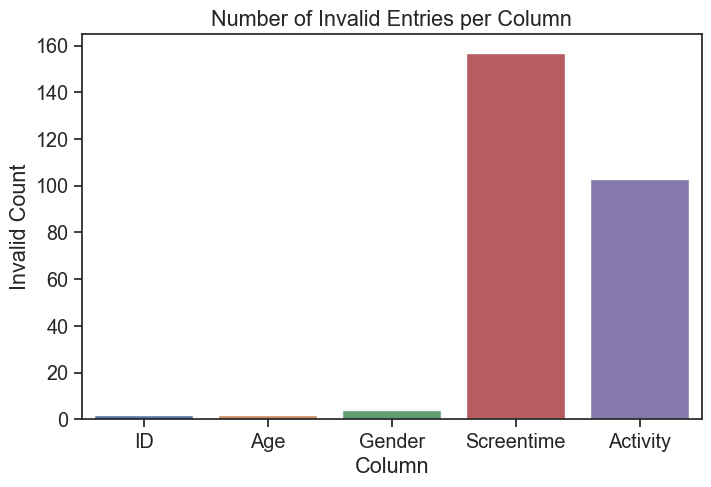

There are 2 invalid entries in the ID column.
There are 2 invalid entries in the age column.
There are 4 invalid entries in the gender column.
There are 157 invalid entries in the screentime column.
There are 103 invalid entries in the activity column.


In [16]:
#show invalid enteries visually using a barplot
#set theme for visualization
sns.set_theme(context = 'notebook', style = 'ticks', palette = 'deep', font = 'sans-serif', font_scale = 1.3, color_codes = True, rc = None)

#count invalid entries in each column (use .shape[0])
invalid_counts = {
    "ID": invalid_entries_ID.shape[0],  
    "Age": invalid_entries_age.shape[0], 
    "Gender": invalid_entries_gender.shape[0],  
    "Screentime": invalid_entries_screentime.shape[0], 
    "Activity": invalid_entries_activity.shape[0]  
}

#convert to DataFrame for easy plotting ([('ID', 2), ('Age', 2), ('Gender', 4), ('Screentime', 157), ('Activity', 103)])
invalid_df = pd.DataFrame(list(invalid_counts.items()), columns=['Column', 'Invalid Count'])

#plotting the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Column", y="Invalid Count", data=invalid_df, hue = 'Column')

#adding titles and labels
plt.title("Number of Invalid Entries per Column")
plt.ylabel("Invalid Count")
plt.xlabel("Column")

#show the plot
plt.show()
print ('There are 2 invalid entries in the ID column.\nThere are 2 invalid entries in the age column.\nThere are 4 invalid entries in the gender column.\nThere are 157 invalid entries in the screentime column.\nThere are 103 invalid entries in the activity column.') 

Q2) Can you detect any biases for missing screen time and physical activity values?

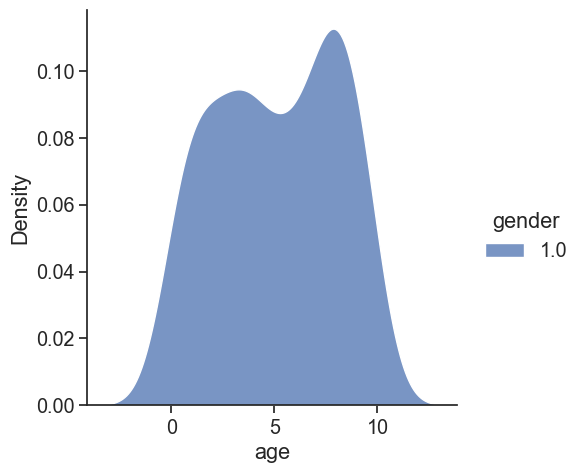

In [19]:
#distribution of those with missing screentime values
missing_screen = Lecture_3[Lecture_3['screentime'].isnull()]
sns.displot(data = missing_screen, x= 'age', hue='gender', kind='kde', multiple='stack', legend = True)

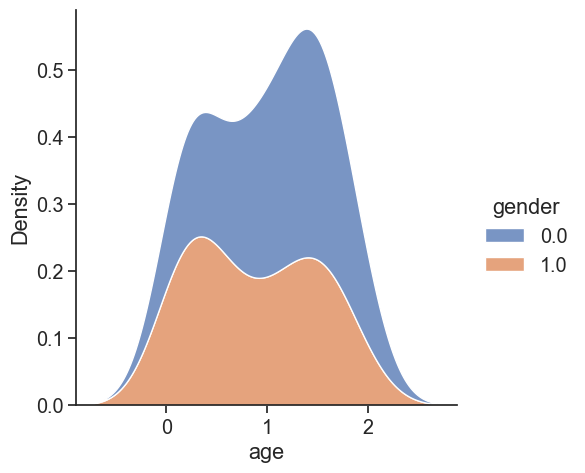

In [21]:
#distribution of those with missing activity values
missing_act = Lecture_3[Lecture_3['activity'].isnull()]
sns.displot(data = missing_act, x= 'age', hue='gender', kind='kde', multiple='stack', legend = True)

Answer = From the distribution plots above, the following biases can be noted among the missing values for screentime and activity:

a) While it appears that the missing screentime values are spread out across all ages, all the kids who did not have screentime values were identified as 'female'

b) It appears that those who did not enter activity values were largely between the ages of 0-2, and the majority were identified as 'male'.

Part 2) Students in BME1510 are expected to complete six assignments. However, 20% of student miss at least one assignment. Suggest an approach to deal with missing assignment marks

Answer = In order to deal with the missing assignment marks, we suggest that the course is structured so that the top 5/6 assignments are counted for the mark, and the lowest mark from the 6 assignments is dropped. This will reweight the assignments, so that if they are worth 60%, each assignment becomes worth 12% instead of 10%.